# Data Visualizations Notebook

This notebook contains a comprehensive workflow for loading, preprocessing, and visualizing a given dataset. Each step includes detailed explanations to ensure reproducibility and clarity in data exploration and analysis.

### Goal: Visualize aspects of your analysis
You will illustrate the work of your analysis with a few time series graphs. The wildfire data is annual, so your time series will be on an annual basis. All the time series should cover the analysis range defined above, but not the prediction range.
1. Produce a histogram showing the number of fires occurring every 50 mile distance from your assigned city for all fires ranging up to 1800 miles away from your assigned city. Your histogram should indicate the distance cut-off for your modeling work as specified in Step 1.
2. Produce a time series graph of total acres burned per year for the fires occurring in the specified distance from your city.
3. Produce a time series graph containing your fire smoke estimates for your city and the AQI estimates for your city.

## License
This code example was developed by Dr. David W. McDonald for use in DATA 512, a course in the UW MS Data Science degree program. This code is provided under the [Creative Commons](https://creativecommons.org) [CC-BY license](https://creativecommons.org/licenses/by/4.0/). Revision 1.2 - August 16, 2024

The rest of the code lies under the standard MIT license.

#### External Libraries

Uncomment the below cell to install and import the external dependencies from the following libraries - 
1. `pandas`
2. `matplotlib`

In [2]:
# ! pip install pandas
# ! pip install matplotlib

In [2]:
#
# Import libraries
#
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
#
# Reading all CSV files required for data visualization
#
wildfire_data = pd.read_csv("intermediate_files/wildfires_with_distances.csv")
aqi_data = pd.read_csv("aqi_yearly.csv")
smoke_estimate_data = pd.read_csv("smoke_estimate_data.csv")

C:\Users\navya\AppData\Local\Temp\ipykernel_24492\2497791320.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  wildfire_data = pd.read_csv("intermediate_files/wildfires_with_distances.csv")


## Histogram showing the number of fires occurring every 50 mile distance from your assigned city for all fires ranging up to 1800 miles away from Centennial, CO.

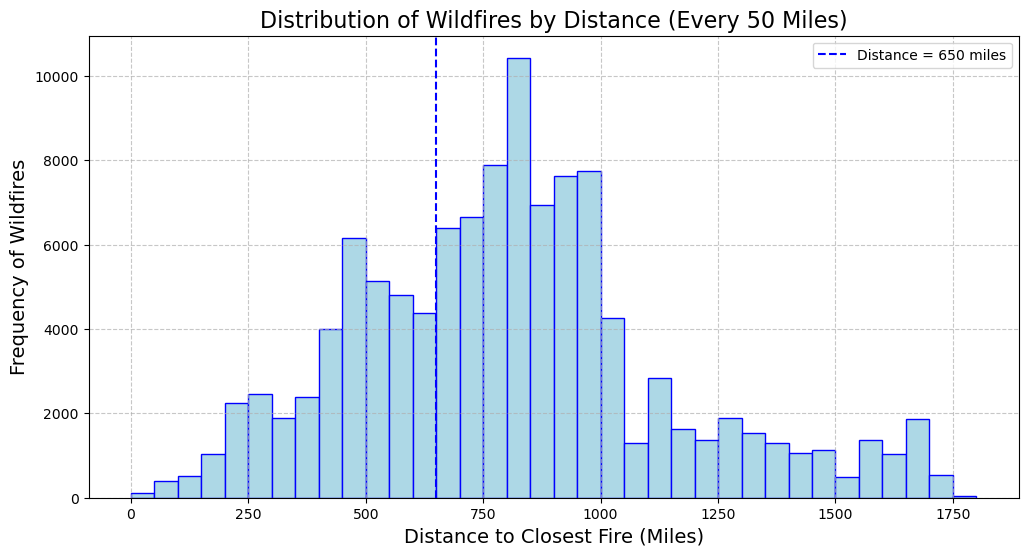

In [16]:
# Create a figure for the histogram
plt.figure(figsize=(12, 6))

# Plot the histogram for distances to wildfires
plt.hist(wildfire_data["Min_Distance_Miles"], bins=range(0, 1801, 50), edgecolor="blue", color="lightblue")

plt.xlabel('Distance to Closest Fire (Miles)', fontsize=14)
plt.ylabel('Frequency of Wildfires', fontsize=14)
plt.title('Distribution of Wildfires by Distance (Every 50 Miles)', fontsize=16)

# Add a vertical line to indicate a 650 mile mark 
plt.axvline(x=650, color='blue', label='Distance = 650 miles', linestyle='--')
plt.grid(True, linestyle='--', alpha=0.7)  

# Show the legend
plt.legend()

# Display the plot
plt.show()


### Analysis 

This histogram illustrates the distribution of wildfires based on their distance from a reference point, with each bar representing a 50-mile range. The distribution is unimodal and approximately symmetric, with a clear peak around 750 miles. This suggests that most wildfires tend to occur within a specific distance range, notably between 500 and 1000 miles from the reference point.

While the majority of data points fall within the central range, a few wildfires occur at farther distances, extending up to around 1750 miles, though these instances are less common.

The segment of code filters the `wildfire_data` to include only wildfires within 650 miles, then groups this data by `Fire_Year`
to aggregate the total area burned, converting the values from acres to millions of acres and rounding to two decimal places. 

In [7]:
closest_wildfires = (
    wildfire_data[wildfire_data["Min_Distance_Miles"] <= 650]
    .groupby("Fire_Year")
    .agg(GIS_Acres_in_millions=("GIS_Acres", lambda x: round(x.sum() / 100000, 2)))
    .reset_index()
    .sort_values(by="Fire_Year")
)

closest_wildfires.head()

,Fire_Year,GIS_Acres_in_millions
0,1964,1.13
1,1965,0.46
2,1966,3.53
3,1967,0.32
4,1968,0.41


## Time series graph of total acres burned per year for the fires occurring within 650 miles from Centennial, CO

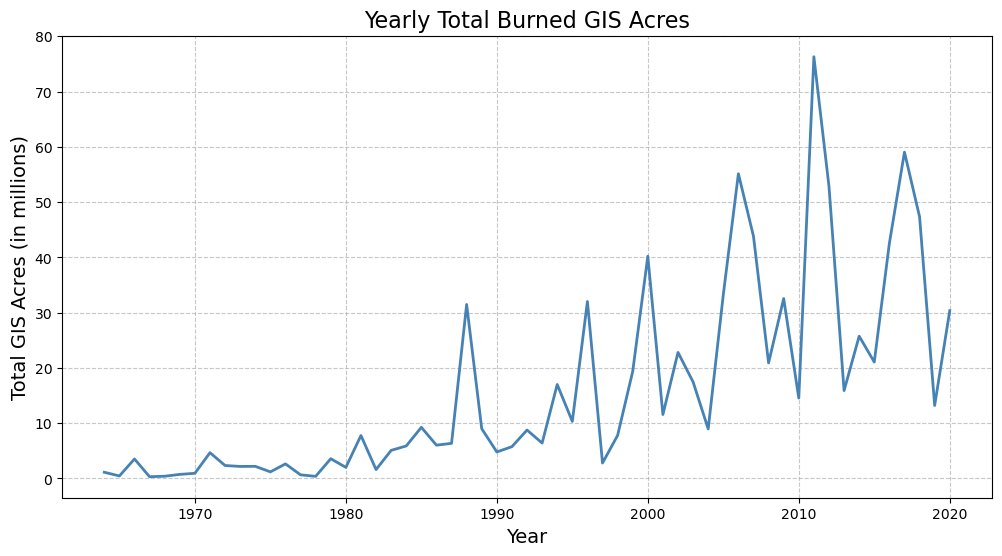

In [17]:
plt.figure(figsize=(12, 6))

plt.plot(closest_wildfires["Fire_Year"], closest_wildfires["GIS_Acres_in_millions"], color="steelblue", linewidth=2)

plt.xlabel('Year', fontsize=14)
plt.ylabel('Total GIS Acres (in millions)', fontsize=14)
plt.title('Yearly Total Burned GIS Acres', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)  

plt.show()

### Analysis

This line plot shows the yearly total burned GIS acres (in millions) from the early 1960s to the 2020s. The trend indicates a relatively low and stable number of burned acres from the 1960s to the 1990s, with only minor fluctuations. However, starting around the year 2000, there is a noticeable increase in burned acres, with significant spikes in certain years. The most extreme peak occurs around 2010, reaching nearly 80 million acres. This increase in burned acreage over recent decades could reflect factors such as rising temperatures, drier conditions, or other environmental changes, highlighting the intensifying impact of wildfires in recent years.

## Time series graph containing your fire smoke estimates  and the AQI estimates for Centennial, CO

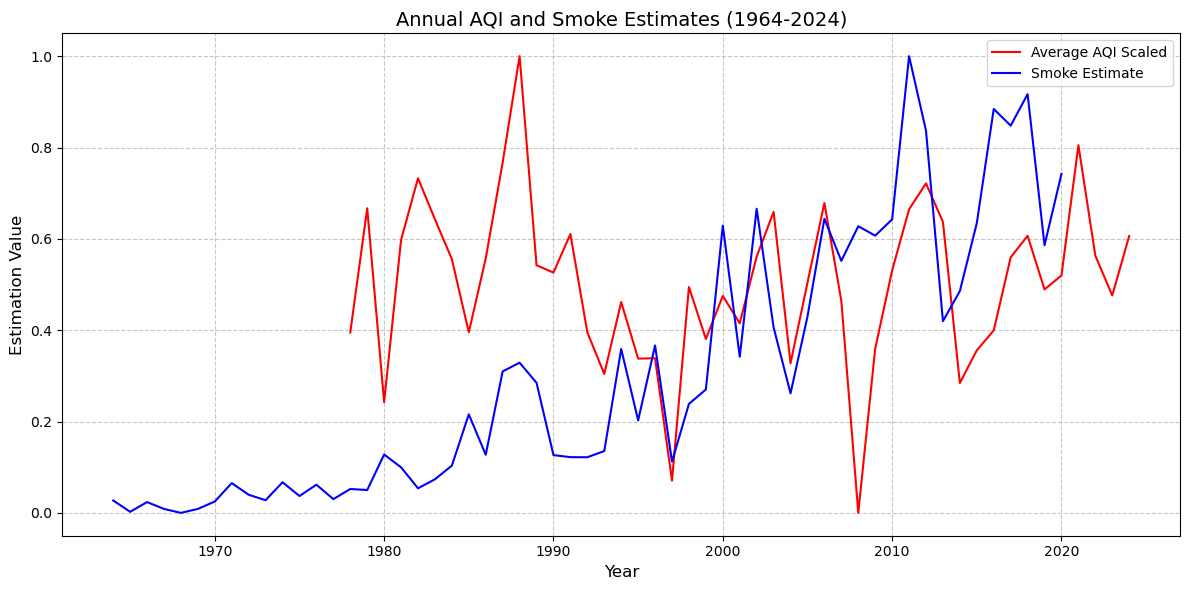

In [18]:
plt.figure(figsize=(12, 6))

# Plot the weighted average AQI over the years 
plt.plot(aqi_data["Year"], aqi_data["average_aqi_scaled"], color="red", label="Average AQI Scaled")

# Plot the smoke estimates over the years 
plt.plot(smoke_estimate_data["Year"], smoke_estimate_data["smoke_estimate"], color="blue", label="Smoke Estimate")

plt.xlabel('Year', fontsize=12)
plt.ylabel('Estimation Value', fontsize=12)
plt.title('Annual AQI and Smoke Estimates (1964-2024)', fontsize=14)

# Add grid lines for better readability of the graph
plt.grid(True, linestyle='--', alpha=0.7)  

# Add a legend to differentiate the two plotted lines
plt.legend()

# Show the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
plt.show()


### Analysis

This line chart shows the trends of two different variables—Average AQI (Air Quality Index) and Smoke Estimates—over time, from 1964 to 2024. Both variables are normalized on a scale from 0 to 1 to allow comparison.

1. **Average AQI Scaled (red line)**: This line generally increases over time, showing fluctuations in air quality with significant peaks around the mid-1980s, early 2000s, and early 2010s. Periods of noticeable decline are also present, indicating temporary improvements in air quality.

2. **Smoke Estimate (blue line)**: This estimate shows a steady increase, especially after the 1980s, with notable peaks in the early 2000s and after 2010, corresponding with wildfire activity and smoke events. The line shows high variability, especially in recent years, suggesting an increase in smoke-related events.

The two lines occasionally overlap, suggesting a correlation between smoke events and higher AQI values, although not consistently. Overall, the chart indicates a general upward trend in both AQI and smoke estimates, reflecting worsening air quality and an increase in smoke events over the decades.